In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



descriptive statistics:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  

columns in dataset:
['Customer ID', 'Age', 'Gender', 'Item Purch

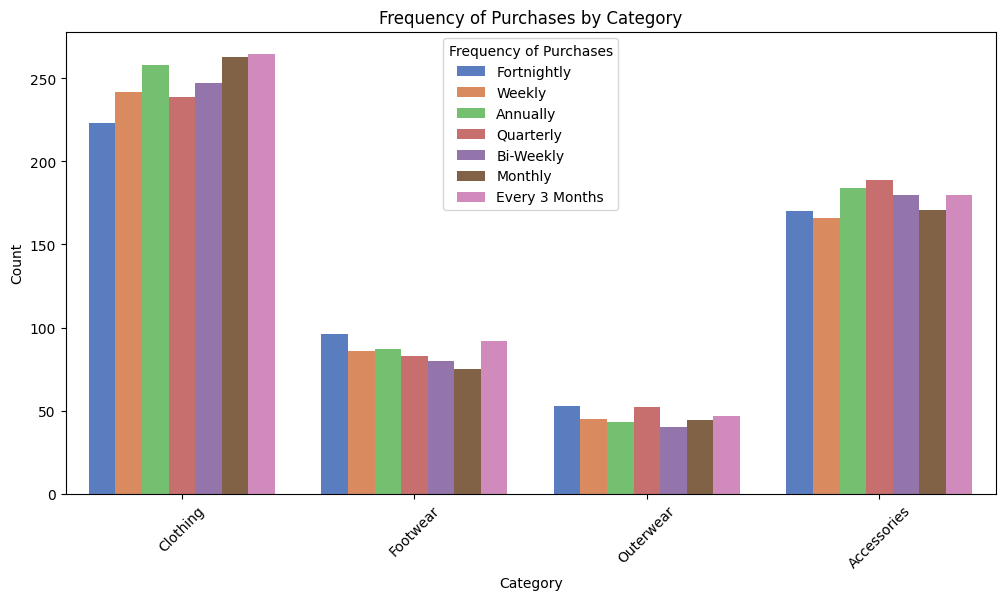

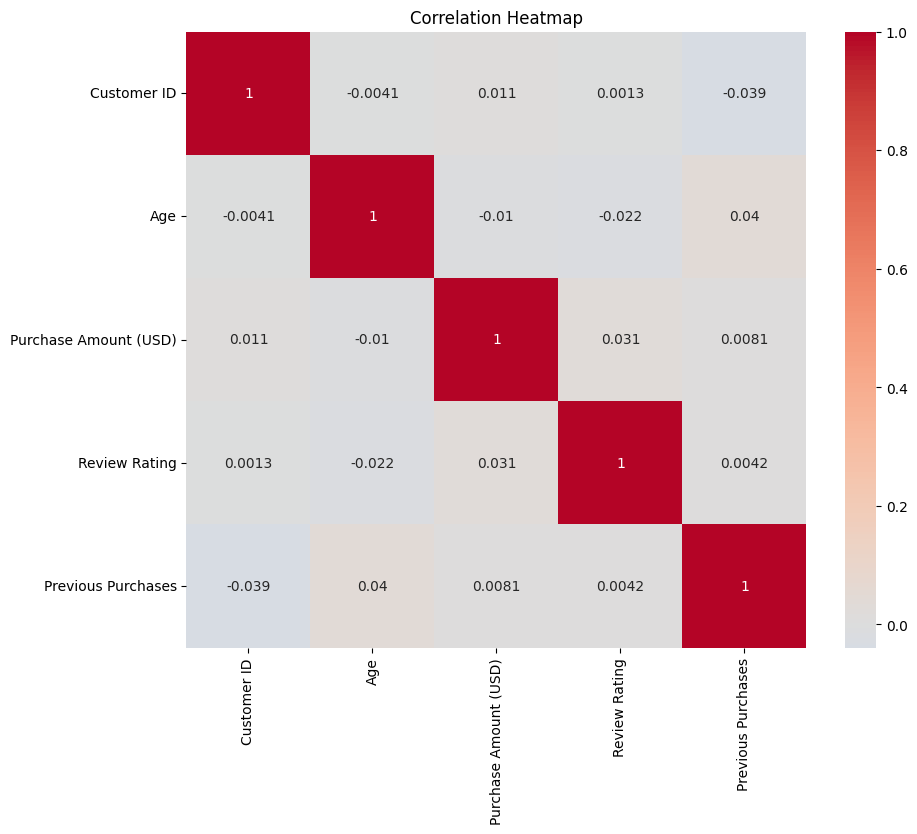


Statistical moments for age:
Mean: 44.07
Variance: 231.27
Skewness: -0.01
Kurtosis: -1.20


<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

df = pd.read_csv('shopping_trends_updated.csv').dropna()  
print("\ndescriptive statistics:")
print(df.describe()) 
print("\ncolumns in dataset:")
print(list(df.columns))


if 'item Purchased' in df.columns:
    plt.figure(figsize=(11, 7))
    sns.scatterplot(data=df, x='age', y='item Purchased', hue='gender', palette='deep')
    plt.title('age vs. item Purchased by gender')
    plt.xlabel('age')
    plt.ylabel('item Purchased')
    plt.legend(title='gender')
    plt.show()
else:
    print(f"Column {'item Purchased'} is missing. Scatter plot can't be created.")


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', hue='Frequency of Purchases', palette='muted')
plt.title('Frequency of Purchases by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Frequency of Purchases')
plt.show()


Numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[Numeric_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


AGE_DATA = df['Age'].dropna()  

M_age = AGE_DATA.mean()  #MEAN 1
V_age = AGE_DATA.var()   #VARIANCE 2
SK_age = skew(AGE_DATA)  #SKEWNESS 3
K_age = kurtosis(AGE_DATA)  #KURTOSIS 4


print("\nStatistical moments for age:")
print(f"Mean: {M_age:.2f}")
print(f"Variance: {V_age:.2f}")
print(f"Skewness: {SK_age:.2f}")
print(f"Kurtosis: {K_age:.2f}")


plt.savefig('analysis_plots.png')
